In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
X_train = pd.read_csv('./X_train_itDkypA.csv', index_col=0)
Y_train = pd.read_csv('./y_train_3LeeT2g.csv', index_col=0)
X_test=pd.read_csv('./X_test_Beg4ey3.csv', index_col=0)
X_test.head()

,ID_DAY,RET_216,RET_238,RET_45,RET_295,RET_230,RET_120,RET_188,RET_260,RET_15,...,RET_122,RET_194,RET_72,RET_293,RET_281,RET_193,RET_95,RET_162,RET_297,ID_TARGET
ID,,,,,,,,,,,,,,,,,,,,,
267100,83,0.043712,0.02026,0.027425,NaN,0.006963,0.000528,0.02768,0.037824,-0.011036,...,0.016991,0.022084,-0.006699,0.017606,0.005505,-0.00041,0.018637,0.020723,0.018418,139
267101,83,0.043712,0.02026,0.027425,NaN,0.006963,0.000528,0.02768,0.037824,-0.011036,...,0.016991,0.022084,-0.006699,0.017606,0.005505,-0.00041,0.018637,0.020723,0.018418,129
267102,83,0.043712,0.02026,0.027425,NaN,0.006963,0.000528,0.02768,0.037824,-0.011036,...,0.016991,0.022084,-0.006699,0.017606,0.005505,-0.00041,0.018637,0.020723,0.018418,136
267103,83,0.043712,0.02026,0.027425,NaN,0.006963,0.000528,0.02768,0.037824,-0.011036,...,0.016991,0.022084,-0.006699,0.017606,0.005505,-0.00041,0.018637,0.020723,0.018418,161
267104,83,0.043712,0.02026,0.027425,NaN,0.006963,0.000528,0.02768,0.037824,-0.011036,...,0.016991,0.022084,-0.006699,0.017606,0.005505,-0.00041,0.018637,0.020723,0.018418,217


In [3]:
X_train.head()

,ID_DAY,RET_216,RET_238,RET_45,RET_295,RET_230,RET_120,RET_188,RET_260,RET_15,...,RET_122,RET_194,RET_72,RET_293,RET_281,RET_193,RET_95,RET_162,RET_297,ID_TARGET
ID,,,,,,,,,,,,,,,,,,,,,
0,3316,0.004024,0.009237,0.004967,NaN,0.01704,0.013885,0.041885,0.015207,-0.003143,...,0.007596,0.01501,0.014733,-0.000476,0.006539,-0.010233,0.001251,-0.003102,-0.094847,139
1,3316,0.004024,0.009237,0.004967,NaN,0.01704,0.013885,0.041885,0.015207,-0.003143,...,0.007596,0.01501,0.014733,-0.000476,0.006539,-0.010233,0.001251,-0.003102,-0.094847,129
2,3316,0.004024,0.009237,0.004967,NaN,0.01704,0.013885,0.041885,0.015207,-0.003143,...,0.007596,0.01501,0.014733,-0.000476,0.006539,-0.010233,0.001251,-0.003102,-0.094847,136
3,3316,0.004024,0.009237,0.004967,NaN,0.01704,0.013885,0.041885,0.015207,-0.003143,...,0.007596,0.01501,0.014733,-0.000476,0.006539,-0.010233,0.001251,-0.003102,-0.094847,161
4,3316,0.004024,0.009237,0.004967,NaN,0.01704,0.013885,0.041885,0.015207,-0.003143,...,0.007596,0.01501,0.014733,-0.000476,0.006539,-0.010233,0.001251,-0.003102,-0.094847,217


In [4]:
cat=pd.read_csv("./supplementary_data_Vkoyn8z.csv")

In [5]:
cat.head()

,ID_asset,CLASS_LEVEL_1,CLASS_LEVEL_2,CLASS_LEVEL_3,CLASS_LEVEL_4
0,216,2,2,12,20
1,238,2,2,12,21
2,45,3,5,20,32
3,295,10,22,49,77
4,230,4,10,28,47


In [6]:
illiquid_columns=[col for col in X_train.columns if col.startswith('RET_')]
illiquid_ids=[int(col.split('_')[1]) for col in illiquid_columns]
liquid_ids=list(X_train['ID_TARGET'].unique())
liquid_columns=[f'RET_{i}' for i in liquid_ids]

We start by reconstructing a full training dataset by merging input features (X_train) with the corresponding targets (Y_train) using the unique identifier ID.
This allows us to work with a unified representation of features and labels for exploratory analysis and model development.

In [8]:
returns={}
for day in X_train['ID_DAY'].unique(): 
    day_rows=X_train[X_train['ID_DAY']==day]
    a=day_rows.iloc[0][illiquid_columns]
    b=Y_train.loc[day_rows.index,'RET_TARGET'].values
    B=pd.Series(b, index=[f'RET_{i}' for i in day_rows['ID_TARGET']])
    returns[day]=pd.concat([a,B])
returns_df=pd.DataFrame(returns).T
returns_df.head()

,RET_0,RET_1,RET_102,RET_105,RET_106,RET_108,RET_109,RET_110,RET_114,RET_115,...,RET_88,RET_9,RET_90,RET_91,RET_93,RET_95,RET_96,RET_97,RET_98,RET_99
3316,-0.016501,0.018693,0.005316,NaN,0.001352,0.027374,-0.010890,0.057911,0.014155,0.021104,...,0.027113,0.008602,0.018250,0.038581,0.027588,0.001251,0.037917,-0.002689,0.002140,0.023026
3355,0.000674,0.005759,0.007938,NaN,-0.005017,-0.007413,-0.005980,0.011900,-0.011755,0.032401,...,0.017933,0.001658,0.061274,-0.018643,0.000372,-0.010232,-0.013496,0.013819,-0.036501,0.017736
1662,-0.000919,0.010430,0.007901,NaN,0.006959,0.005593,-0.066666,0.049822,0.021599,0.019816,...,0.016645,-0.016289,0.027690,-0.026479,0.006664,0.023721,0.013057,-0.008237,0.014655,0.011614
3405,-0.004989,0.004558,0.004325,NaN,-0.007720,0.002788,-0.038432,-0.021308,0.000595,0.001613,...,-0.039065,0.021897,-0.031456,0.029652,0.016171,-0.024835,-0.020391,0.006790,0.015796,-0.015763
1602,0.002468,-0.024584,0.008947,NaN,-0.004735,-0.031061,0.012366,0.045117,-0.015403,-0.015327,...,-0.028080,0.016530,0.019826,0.014627,0.010884,-0.025205,0.006157,-0.006526,0.002125,0.036186


In [9]:
illiquids_ret=returns_df[illiquid_columns]
liquids_ret=returns_df[liquid_columns]
illiquids_ret.describe()

,RET_216,RET_238,RET_45,RET_295,RET_230,RET_120,RET_188,RET_260,RET_15,RET_150,...,RET_108,RET_122,RET_194,RET_72,RET_293,RET_281,RET_193,RET_95,RET_162,RET_297
count,2732.000000,2427.000000,2726.000000,2403.000000,2714.000000,2547.000000,2542.000000,2741.000000,2694.000000,2661.000000,...,2547.000000,2677.000000,2713.000000,2715.000000,2718.000000,2621.000000,2709.000000,2591.000000,2694.000000,2545.000000
mean,0.000793,0.000972,-0.000190,0.000771,0.000136,0.000712,0.000450,0.000295,0.000074,0.000394,...,0.000814,0.000644,0.000254,0.000274,0.000234,0.000615,0.000096,0.000252,0.000576,-0.000319
std,0.029529,0.030113,0.025908,0.028681,0.023810,0.025105,0.026600,0.021891,0.025889,0.030111,...,0.026971,0.026383,0.022117,0.027012,0.022471,0.023968,0.016197,0.023339,0.028081,0.025082
min,-0.133870,-0.130425,-0.118084,-0.140726,-0.140457,-0.106172,-0.112848,-0.120870,-0.150917,-0.128456,...,-0.125380,-0.122178,-0.135561,-0.123352,-0.124785,-0.117786,-0.119019,-0.126782,-0.116853,-0.102842
25%,-0.013724,-0.014789,-0.013104,-0.014085,-0.011366,-0.011505,-0.012270,-0.011458,-0.012171,-0.015169,...,-0.013178,-0.012378,-0.010298,-0.014891,-0.010117,-0.011385,-0.006450,-0.010189,-0.012882,-0.012770
50%,-0.000274,-0.000096,-0.000793,-0.001096,-0.000355,-0.000063,-0.001214,-0.000506,-0.000959,-0.000431,...,-0.000602,-0.000646,-0.000953,-0.000183,-0.001057,-0.000427,-0.000647,-0.000533,-0.000616,-0.001334
75%,0.014242,0.013552,0.011194,0.012623,0.011070,0.011126,0.010397,0.010490,0.010539,0.013990,...,0.013285,0.011142,0.008652,0.013791,0.009217,0.011055,0.005796,0.008418,0.012201,0.011060
max,0.117665,0.129644,0.128585,0.121098,0.107590,0.114755,0.126832,0.121062,0.125701,0.117621,...,0.123634,0.117084,0.107828,0.154639,0.108747,0.118805,0.109041,0.119799,0.140680,0.137504


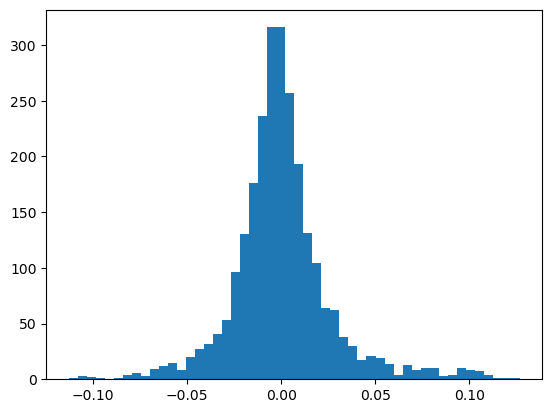

In [10]:
plt.hist(illiquids_ret['RET_188'], bins=50)
plt.show()

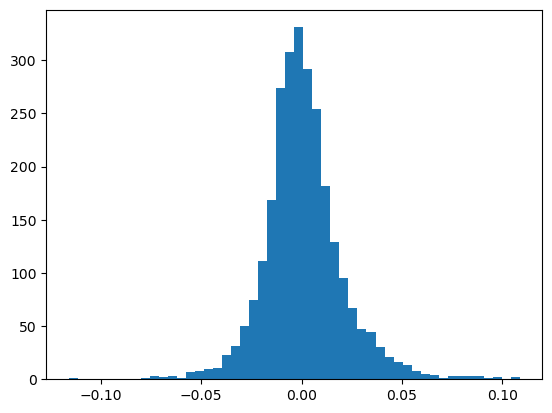

In [11]:
plt.hist(liquids_ret.iloc[:,12], bins=50)
plt.show()

We introduce a helper function to group assets by class. The goal is to investigate whether sectoral structure can be exploited to extract common factors and improve the stability of cross-asset relationships between illiquid and liquid instruments.

In [13]:
def getassetsbyclass(classlevel, cat, illiquid_ids, liquid_ids):
    filtered=cat[cat['CLASS_LEVEL_1']==classlevel]
    illiquid_assets=[f'RET_{i}' for i in filtered['ID_asset'] if i in illiquid_ids]
    liquid_assets=[f'RET_{i}' for i in filtered['ID_asset'] if i in liquid_ids]
    return illiquid_assets, liquid_assets

In [14]:
cat['type']=cat['ID_asset'].apply(lambda x: 'illiquid' if x in illiquid_ids else 'liquid')

In [15]:
count=cat.groupby(['CLASS_LEVEL_1','type'])['ID_asset'].count().unstack()
count

type,illiquid,liquid
CLASS_LEVEL_1,,
0,2,4
1,18,16
2,27,20
3,9,10
4,6,8
5,5,10
6,3,7
7,9,5
8,1,2


## Handling NaNs

In [17]:
for class_level in cat['CLASS_LEVEL_1'].unique(): 
    illiq_assets, _ = getassetsbyclass(class_level, cat, illiquid_ids, liquid_ids)
    
    if not illiq_assets:
        continue

    sub_df = returns_df[illiq_assets]
    row_medians = sub_df.median(axis=1)
    
    for col in illiq_assets: 
        returns_df[col] = returns_df[col].mask(
            returns_df[col].isna(),
            row_medians
        )

In [18]:
returns_df[illiquid_columns] = returns_df[illiquid_columns].fillna(
    returns_df[illiquid_columns].median(axis=0)
)
returns_df[illiquid_columns] = returns_df[illiquid_columns].fillna(0.0)


In [19]:
returns_df[illiquid_columns].isnull().sum().sum()

0

In [20]:
returns_df[liquid_columns].isnull().sum().sum()

7700

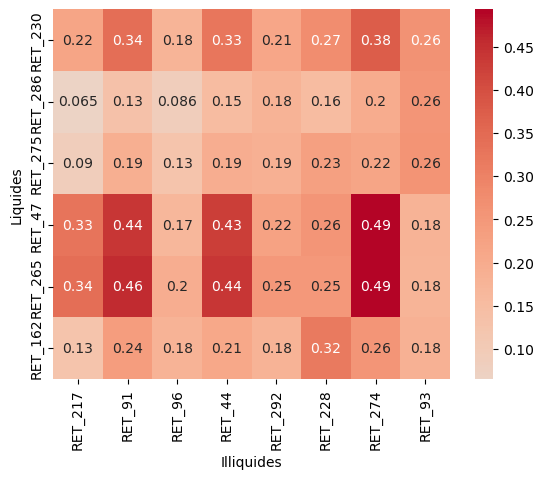

<Figure size 1200x600 with 0 Axes>

In [23]:
c=4
illiqassets, liqassets=getassetsbyclass(c, cat, illiquid_ids, liquid_ids)
corr_map=returns_df[illiqassets+liqassets].corr().loc[illiqassets, liqassets]
sns.heatmap(corr_map, annot=True, cmap='coolwarm', center=0)
plt.xlabel('Illiquides')
plt.ylabel('Liquides')
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

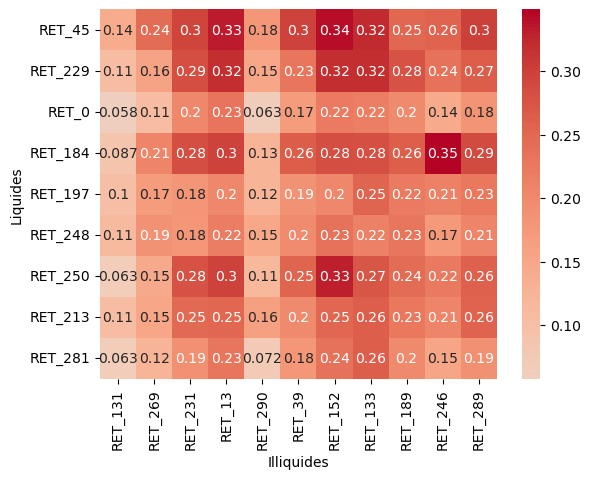

<Figure size 1200x600 with 0 Axes>

In [24]:
c,d=3,9
illiqassets0, liqassets0=getassetsbyclass(c, cat, illiquid_ids, liquid_ids)
illiqassets1, liqassets1=getassetsbyclass(d, cat, illiquid_ids, liquid_ids)
corr_map=returns_df[illiqassets0+liqassets1].corr().loc[illiqassets0, liqassets1]
sns.heatmap(corr_map, annot=True, cmap='coolwarm', center=0)
plt.xlabel('Illiquides')
plt.ylabel('Liquides')
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

returns_train, returns_test = train_test_split(
    returns_df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
# We'll add PCA features to both dataframes
pca_columns = []
pcas = {}
# Helper: safe conversion to float matrix
def _to_float_matrix(df, cols):
    return df[cols].astype(float).to_numpy()

# -----------------------------
# 2) Fit PCA per CLASS_LEVEL_1 on TRAIN only, then transform TEST
# -----------------------------
for c in cat["CLASS_LEVEL_1"].unique():
    illiq_assets, _ = getassetsbyclass(c, cat, illiquid_ids, liquid_ids)
    if len(illiq_assets) == 0:
        continue

    # X matrices
    X_tr = _to_float_matrix(returns_train, illiq_assets)
    X_te = _to_float_matrix(returns_test, illiq_assets)

    n_assets = X_tr.shape[1]
    if n_assets == 0:
        continue

    # Choose number of components: up to 3, but not more than number of assets
    n_comp = min(3, n_assets)

    # Case 1: only 1 asset => no PCA model, just use the asset itself as a "factor"
    if n_comp == 1:
        col_name = f"PCA_{c}_1"
        returns_train[col_name] = X_tr[:, 0]
        returns_test[col_name]  = X_te[:, 0]
        pca_columns.append(col_name)
        pcas[c] = None
        continue

    # Case 2: real PCA (2 or 3 components)
    pca = PCA(n_components=n_comp, random_state=0)
    Z_tr = pca.fit_transform(X_tr)  # fit on train
    Z_te = pca.transform(X_te)      # transform test

    pcas[c] = pca

    for k in range(n_comp):
        col_name = f"PCA_{c}_{k+1}"
        returns_train[col_name] = Z_tr[:, k]
        returns_test[col_name]  = Z_te[:, k]
        pca_columns.append(col_name)

# Quick check
returns_train.head(), returns_test.head(), pca_columns[:10]


C:\Users\hp\AppData\Local\Temp\ipykernel_19064\491998558.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_train[col_name] = Z_tr[:, k]
C:\Users\hp\AppData\Local\Temp\ipykernel_19064\491998558.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_test[col_name]  = Z_te[:, k]
C:\Users\hp\AppData\Local\Temp\ipykernel_19064\491998558.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

(         RET_0     RET_1   RET_102   RET_105   RET_106   RET_108   RET_109  \
 1721 -0.004582  0.037498 -0.008179  0.025879 -0.000731 -0.000194 -0.023092   
 3337 -0.030395 -0.009543  0.003554 -0.023914 -0.010848 -0.006502 -0.015912   
 3691 -0.003287  0.008902  0.005303 -0.001760       NaN  0.016406 -0.009213   
 2573  0.040419  0.001968 -0.021216 -0.032429 -0.007106  0.030186 -0.008876   
 1684  0.000838       NaN  0.007961  0.043001  0.028766 -0.006201 -0.009161   
 
        RET_110   RET_114   RET_115  ...   PCA_9_2   PCA_9_3   PCA_6_1  \
 1721  0.036815 -0.004903 -0.014508  ...  0.009172  0.001471  0.017332   
 3337 -0.021535 -0.006953 -0.001393  ... -0.006328 -0.014013  0.028494   
 3691 -0.002120  0.009998  0.011308  ...  0.002434  0.007135  0.004611   
 2573 -0.015095  0.001074  0.011983  ...  0.000618  0.005711 -0.042443   
 1684  0.041516 -0.021334  0.035536  ...  0.037118  0.081883 -0.074623   
 
        PCA_6_2   PCA_6_3   PCA_5_1   PCA_5_2   PCA_5_3   PCA_0_1   PCA_0_2  


In [27]:
def qrt_score(y_true, y_pred):
    # y_true et y_pred sont des arrays shape (n_samples,)
    weights = np.abs(y_true)
    correct = (np.sign(y_pred) == np.sign(y_true)).astype(int)
    return np.sum(weights * correct) / np.sum(weights)

In [28]:
from sklearn.linear_model import Ridge
alpha = 0.006

# Features
Xtr = returns_train[pca_columns].astype(float)
Xte = returns_test[pca_columns].astype(float)

models = {}
scores = {}

for j in liquid_ids:
    col = f"RET_{j}"   # liquid target column name in returns_df

    if col not in returns_train.columns or col not in returns_test.columns:
        continue

    ytr = returns_train[col].astype(float)
    yte = returns_test[col].astype(float)

    # Mask: liquid NaNs are non-observed labels, we exclude them
    mtr = ytr.notna()
    mte = yte.notna()

    # Need at least some data to train and evaluate
    if mtr.sum() < 10 or mte.sum() < 5:
        continue

    # Train ridge on observed labels only
    model = Ridge(alpha=alpha, fit_intercept=True, random_state=0)
    model.fit(Xtr.loc[mtr], ytr.loc[mtr], sample_weight=np.abs(ytr.loc[mtr]).values)

    # Predict on test (observed labels only)
    yhat_te = model.predict(Xte.loc[mte])

    # Local metric (weighted sign accuracy)
    score_j = qrt_score(y_true=yte.loc[mte].values, y_pred=yhat_te)

    models[j] = model
    scores[j] = score_j

# Aggregate local score (simple average across liquid assets with enough data)
local_mean_score = float(np.mean(list(scores.values()))) if len(scores) > 0 else np.nan
local_median_score = float(np.median(list(scores.values()))) if len(scores) > 0 else np.nan

print(f"Local validation — Ridge(alpha={alpha})")
print(f"Evaluated assets: {len(scores)} / {len(liquid_ids)}")
print(f"Mean score:   {local_mean_score:.4f}")
print(f"Median score: {local_median_score:.4f}")

Local validation — Ridge(alpha=0.006)
Evaluated assets: 100 / 100
Mean score:   0.7117
Median score: 0.7174


In [29]:
import numpy as np
from sklearn.decomposition import PCA

# Fit PCA on the full day-level dataset
pca_columns_full = []
pcas_full = {}

for c in cat["CLASS_LEVEL_1"].unique():
    illiq_assets, _ = getassetsbyclass(c, cat, illiquid_ids, liquid_ids)
    if len(illiq_assets) == 0:
        continue

    X = returns_df[illiq_assets].astype(float).to_numpy()
    n_assets = X.shape[1]
    if n_assets == 0:
        continue

    n_comp = min(3, n_assets)

    # Case: only 1 asset -> use it directly as a "factor"
    if n_comp == 1:
        col_name = f"PCA_{c}_1"
        returns_df[col_name] = X[:, 0]
        pca_columns_full.append(col_name)
        pcas_full[c] = None
        continue

    # Real PCA
    pca = PCA(n_components=n_comp, random_state=0)
    Z = pca.fit_transform(X)

    pcas_full[c] = pca
    for k in range(n_comp):
        col_name = f"PCA_{c}_{k+1}"
        returns_df[col_name] = Z[:, k]
        pca_columns_full.append(col_name)

# Feature matrix for final training
X_full = returns_df[pca_columns_full].astype(float)
len(pca_columns_full), X_full.shape


C:\Users\hp\AppData\Local\Temp\ipykernel_19064\2217463058.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_df[col_name] = Z[:, k]
C:\Users\hp\AppData\Local\Temp\ipykernel_19064\2217463058.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_df[col_name] = Z[:, k]
C:\Users\hp\AppData\Local\Temp\ipykernel_19064\2217463058.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

(30, (2748, 30))

In [30]:
alpha = 0.006
models_full = {}
train_scores_full = {}  # optional: in-sample score (sanity check)
for j in liquid_ids:
    col = f"RET_{j}"
    if col not in returns_df.columns:
        continue
    y = returns_df[col].astype(float)
    mask = y.notna()

    # safety: need some observations
    if mask.sum() < 10:
        continue

    Xj = X_full.loc[mask]
    yj = y.loc[mask]

    model = Ridge(alpha=alpha, fit_intercept=True, random_state=0)
    model.fit(Xj, yj, sample_weight=np.abs(yj).values)

    models_full[j] = model

    # optional in-sample metric (not a validation, just a sanity check)
    yhat = model.predict(Xj)
    train_scores_full[j] = qrt_score(y_true=yj.values, y_pred=yhat)

print(f"Trained models: {len(models_full)} / {len(liquid_ids)}")
print(f"Mean in-sample score (sanity check): {np.mean(list(train_scores_full.values())):.4f}")


Trained models: 100 / 100
Mean in-sample score (sanity check): 0.7228


### Submission File

In [32]:
X_test[illiquid_columns] = X_test[illiquid_columns].fillna(
    X_test[illiquid_columns].median(axis=0)
)
X_test[illiquid_columns] = X_test[illiquid_columns].fillna(0.0)

In [33]:
X_test.isnull().sum().sum()

0

In [34]:
# Copy to avoid modifying the original
test_df = X_test.copy()

PCA_cols = []

for c, pca in pcas_full.items():
    illiq_assets, _ = getassetsbyclass(c, cat, illiquid_ids, liquid_ids)
    if len(illiq_assets) == 0:
        continue

    X = test_df[illiq_assets].astype(float).to_numpy()
    n_assets = X.shape[1]
    if n_assets == 0:
        continue

    n_comp = min(3, n_assets)

    # Case: only 1 asset -> use the asset directly
    if n_comp == 1:
        col_name = f"PCA_{c}_1"
        test_df[col_name] = X[:, 0]
        PCA_cols.append(col_name)
        continue

    # Real PCA: use trained PCA
    Z = pca.transform(X)

    for k in range(n_comp):
        col_name = f"PCA_{c}_{k+1}"
        test_df[col_name] = Z[:, k]
        PCA_cols.append(col_name)

# Ensure same column order as training
test_df = test_df.copy()
test_df[PCA_cols] = test_df[PCA_cols].astype(float)


In [35]:
test_df.shape

(114468, 132)

In [36]:
PCA_cols == pca_columns_full

True

In [37]:
pred_sign = {}

for idx, row in test_df.iterrows():
    target_id = int(row["ID_TARGET"])
    model = models_full[target_id]
    X_row_df = pd.DataFrame([row[PCA_cols].astype(float).values], columns=PCA_cols)
    yhat = model.predict(X_row_df)[0]

    pred_sign[idx] = 1 if yhat >= 0 else -1

pred_sign = pd.Series(pred_sign, name="RET_TARGET")


In [38]:
submission = pred_sign.reset_index()
submission.columns = ["ID", "RET_TARGET"]

submission.to_csv("submission.csv", index=False)
submission.head()


,ID,RET_TARGET
0,267100,1
1,267101,-1
2,267102,-1
3,267103,1
4,267104,1
